<a href="https://colab.research.google.com/github/RodrigoMarenda/Sports_Predictions/blob/main/notebooks/Sports_Predctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Previsões de Partidas de Futebol Baseadas em Resultados Históricos</p>


![**Previsões de Partidas de Futebol Baseadas em Resultados Históricos**](https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/Crystal_Ball.jpeg?raw=true)

# **Introdução**

### **Definição do Problema:**

"Nos últimos anos, o setor de apostas esportivas tem apresentado um crescimento, impulsionado pelo interesse das pessoas das pessoas em fazer apostas nas "Bets". Neste contexto, a aplicação de machine learning surge como uma ferramenta de apoio para fornecer análises preditivas com base dados históricos.

O Objetivo desse modelo é trabalhar dados complexos para que sejam traduzidos em previsões probabilísticas de fácil compreensão, que possam ajudar o apostador a identificar tendências e reduzir a incerteza na tomada de decisão.

O modelo vai gerar previsões precisas sobre possíveis desfechos dos jogos (como vitória, derrota, empate) ou até mesmo estimar placares específicos.

Ao integrar esse tipo de tecnologia, as plataformas de apostas podem não apenas oferecer um diferencial competitivo aos usuários, mas também melhorar a experiência dos apostadores ao permitir que tomem decisões baseadas em informações mais confiáveis e personalizadas. A inovação agrega valor à experiência de aposta ao transformar dados em insights estratégicos, contribuindo para um ambiente de aposta mais seguro e analítico."



*******************************************

**Descrição do Problema 01 :**

1. Previsão do Resultado do Jogo (Classificação)

•	Problema: Prever o vencedor de uma partida (se o time mandante ou o time visitante vai ganhar). Vamos aplicar um modelo de classificação, onde a variável
alvo seria o vencedor do jogo (mandante visitante ou impate).

**Tipo de Problema**
Tipo de Problema: **classificação supervisionada**  (Mandante vence , Visitante vence ou empate).


  - **Premissa**: Dados históricos dos jogos disputados, com variaveis que possam ser correlacionadas para determinar uma tendencia de resultado.

  - **Hipótese**: Um modelo de machine learning treinado com dados históricos, para identificar padrões que ajudem a prever o resultado das partidas.

  **Variáveis**:

Features (entradas):
Colocação dos times (colocacao_mandante, colocacao_visitante).
Valor das equipes titulares (valor_equipe_titular_mandante, valor_equipe_titular_visitante).
Idade média dos titulares (idade_media_titular_mandante, idade_media_titular_visitante).
Outros fatores como público, estádio, e técnicos.

Target (saída): Vencedor (Mandante,  Visitante ou empate).


*******************************************

**Descrição do Problema 02 :**

2. Previsão do Número de Gols (Regressão)

•	Problema: Prever o número de gols de cada time (mandante ou visitante) durante a partida.

**Tipo de Problema**
•	Tipo de Problema: Regressão, pois estamos prevendo uma quantidade contínua (número de gols).


  - **Premissa**: Dados históricos dos jogos disputados, com variaveis que possam ser correlacionadas para determinar a quantidade de gols para cada time.

  - **Hipótese**: Um modelo de machine learning treinado com dados históricos, para identificar padrões que ajudem a prever o resultado das partidas.


Features (entradas):
	Variáveis relacionadas ao time, como o valor da equipe titular, a colocação no campeonato, idade média dos titulares, técnico, etc.

Target (saída): Gols do mandante ou gols do visitante (dependendo de qual você quer prever).


******************************************

## **Estrutura do projeto:**

[**1. Importação das Bibliotecas:**](#1)

[**2. Carga dos Dados:**](#2)

[**3. Pré-processamento de dados:**](#3)

[**Problema 01: Modelo Classificação**]

 - [**4.1 Análise da Distribuição dos Dados:**](#4)

 - [**5.1 Escolha do algoritmo:**](#5)

 - [**6.1 Otimização do modelo:**](#6)

 - [**7.1 Valiação dos resultados:**](#7)

[**Problema 02: Modelo de Regressão**]

 - [**4.2. Análise da Distribuição dos Dados:**](#4)

 - [**5.2. Escolha do algoritmo:**](#5)

 - [**6.2. Otimização do modelo:**](#6)

 - [**7.2. Valiação dos resultados:**](#7)


[**8. Conclusão:**](#8)

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>

Nessa etapa estamos importanto todas as blibliotecas que serão utilizadas nesse algoritimo

#Step 01: Importação da Bibliotecas

In [2]:
# Imports das Bibliotecas necessárias

import pandas as pd             #Biblioteca para manipulação e análise de dados.
import matplotlib.pyplot as plt #Biblioteca de histogramas e gráficos
import seaborn as sns           #Biblioteca de gráficos
import warnings                 #Biblioteca de avisos
import numpy as np              #Biblioteca de operações numéricas
import os                       #Biblioteca para interagir com o sistema operacional
import random                   #Biblioteca para gerar números aleatórios



# Configuração para não exibir os warnings
warnings.filterwarnings("ignore")


#Step 02: Importação das Bibliotecas de Machine Learning

In [3]:

from sklearn.model_selection import train_test_split          # para particionar em bases de treino e teste (holdout)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # modelo de classificação por floresta aleatória e boosting gradiente
from sklearn.svm import SVC                                   # máquina de vetor de suporte para classificação
from sklearn.preprocessing import StandardScaler              # Normaliza as variáveis numéricas
from sklearn.neighbors import KNeighborsClassifier            # K-Nearest Neighbors (KNN) para classificação
from sklearn.naive_bayes import GaussianNB                    # Naive Bayes Gaussiano para classificação
from sklearn.metrics import confusion_matrix                  # Gera uma matriz de confusão
from sklearn.metrics import classification_report             # relatório de métricas de desempenho de um modelo
from sklearn.model_selection import KFold                     # para preparar os folds da validação cruzada
from sklearn.preprocessing import LabelEncoder                # Converte valores categóricos
from sklearn.exceptions import UndefinedMetricWarning         # identificar problemas em métricas
from sklearn.model_selection import GridSearchCV              # validação cruzada.
from sklearn.preprocessing import Normalizer                  # Normaliza uma base de dados
from sklearn.tree import DecisionTreeClassifier               # Modelo de árvore de decisão para classificação
from sklearn.ensemble import RandomForestClassifier           # Floresta aleatória de árvores de decisão
from sklearn.linear_model import LogisticRegression           # Regressão logística
from sklearn.metrics import accuracy_score, classification_report  # Calcula a acurácia do modelo


# Importação do modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression



from joblib import dump                                       # Para salvar o objeto em um arquivo
from xgboost import XGBClassifier                             # ML para classificação e regressão

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carga dos Dados</p>

Nessa etapa estamos realizando a carga dos dados, que estão armazendos em um arquivo do tipo csv (Comma-Separated Values). Esse dataset foi obtido no Site Base de Dados.Org. Foram coletados dados das partidas de futebol realizadas desde 2013 até o ano de 2024, com o objetivo de realizar a predição de resultados de jogos de futebol.



#Step 01: Carga dos Dados

In [4]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/RodrigoMarenda/Sports_Predictions/refs/heads/main/data/Dados_Brasileirao_org.csv"

# Lê o arquivo e exibe as primeiras linhas
df = pd.read_csv(url, delimiter=';')


# Exibir as primeiras linhas do DataFra
df.head()



,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2007,03/05/2007,1,Estádio Beira-Rio,Paulo César de Oliveira,11870.0,NaN,Internacional,Botafogo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,03/05/2007,1,Estádio Orlando Scarpelli,Vinícius da Costa,6222.0,NaN,Figueirense FC,Atlético-PR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,03/05/2007,1,Estádio Durival Britto e Silva,Elvecio Zequetto,3568.0,NaN,Paraná,Grêmio,Zetti,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,03/05/2007,1,Estádio Jornalista Mário Filho,Leonardo Gaciba da Silva,7801.0,NaN,Flamengo,Palmeiras,Ney Franco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,03/05/2007,1,Estádio Jornalista Mário Filho,Wallace Nascimento Valente,12132.0,NaN,Fluminense,Cruzeiro,Renato Gaúcho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Verificando o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 6692 linhas e 39 colunas.


In [29]:
# Verificando a estrutura do dataset, datatypes das colunas
df.dtypes

,0
ano_campeonato,int64
data,object
rodada,int64
estadio,object
arbitro,object
publico,float64
publico_max,float64
time_mandante,object
time_visitante,object
tecnico_mandante,object


Os tipos de dados estão corretos, mas temos muitas colunas que não fazem sentindo para a analise. Na proxima etapa vamos ajustar o dataset somente com as colunas que fazem sentido para a analise e fazer as tratativas de ETL dos dados.

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Pré-processamento de dados:</p>


Nessa etapa será realizado o ajuste do dataset, para considerar somente com as colunas que fazem sentido para a analise. Também será feita a limpeza, transformação e
o tratamento de dados nulos ou vazios. Faremos a padronização dos dados para melhorar o desempenho do algoritmo.

# Step 01: Removendo as Colunas desnecessarias

In [6]:
# Preparação dos dados


# Removendo algumas colunas do DataFrame
colunas_para_remover = ['arbitro', 'gols_1_tempo_mandante','gols_1_tempo_visitante','escanteios_mandante','escanteios_visitante','faltas_mandante',
'faltas_visitante','chutes_bola_parada_mandante','chutes_bola_parada_visitante','defesas_mandante','defesas_visitante','impedimentos_mandante','impedimentos_visitante','chutes_mandante','chutes_visitante','chutes_fora_mandante','chutes_fora_visitante',
'Resultado_Jogo']

df_selecionado = df.drop(columns=colunas_para_remover)

# Exibindo as primeiras linhas do DataFrame com as colunas removidas
print(df_selecionado.isnull().sum())

print("\n")
print(f"O Dataset de 39 Colunas ficou com {df_selecionado.shape[1]} colunas.")







ano_campeonato                       0
data                                 0
rodada                               0
estadio                             11
publico                              1
publico_max                       2561
time_mandante                        0
time_visitante                       0
tecnico_mandante                   444
tecnico_visitante                  444
colocacao_mandante                   0
colocacao_visitante                  0
valor_equipe_titular_mandante      388
valor_equipe_titular_visitante     388
idade_media_titular_mandante       390
idade_media_titular_visitante      390
gols_mandante                        3
gols_visitante                       3
media_gol_mandante                   0
media_gol_visitante                  0
Artilheiro                           0
dtype: int64


O Dataset de 39 Colunas ficou com 21 colunas.


# Step 02: Identificação das Colunas Vazias ou Nulas

In [7]:
# Verificando se existem valores ausentes no dataset

null_counts = df_selecionado.isnull().sum()

# Loop para verificar as colunas com valores nulos
for column, value in null_counts.items():
    if value != 0:
        print(f"Coluna '{column}' tem {value} valores nulos")



Coluna 'estadio' tem 11 valores nulos
Coluna 'publico' tem 1 valores nulos
Coluna 'publico_max' tem 2561 valores nulos
Coluna 'tecnico_mandante' tem 444 valores nulos
Coluna 'tecnico_visitante' tem 444 valores nulos
Coluna 'valor_equipe_titular_mandante' tem 388 valores nulos
Coluna 'valor_equipe_titular_visitante' tem 388 valores nulos
Coluna 'idade_media_titular_mandante' tem 390 valores nulos
Coluna 'idade_media_titular_visitante' tem 390 valores nulos
Coluna 'gols_mandante' tem 3 valores nulos
Coluna 'gols_visitante' tem 3 valores nulos


# Step 03: Tratativa das Colunas Vazias ou Nulas

Para tratar os Valores nulos, foram adotadas algumas regras de acordo com cada tipo de dado, de forma que essas atribuições de valores não geracem impacto de tendencia para a analise.  





In [8]:


# Tratativa para Valores ausentes
# Loop para verificar e substituir valores nulos em cada coluna
for index, row in df_selecionado.iterrows():

    # estadio                             11
    if pd.isnull(row['estadio']):  # Verificando se o valor da coluna 'estadio' é nulo
        df_selecionado.at[index, 'estadio'] = 'Desconhecido'  # Substituindo por um valor


    #publico                           1711
    if pd.isnull(row['publico']):  # Verificando se o valor da coluna 'publico' é nulo
        df_selecionado.at[index, 'publico'] = 1000  # Substituindo por valor publico minimo


    #publico_max                       4271
    if pd.isnull(row['publico_max']):  # Verificando se o valor da coluna 'publico_max' é nulo
        df_selecionado.at[index, 'publico_max'] = 1000  # Substituindo por valor publico max

    #tecnico_mandante                       2154
    if pd.isnull(row['tecnico_mandante']):  # Verificando se o valor da coluna 'tecnico_mandante' é nulo
        df_selecionado.at[index, 'tecnico_mandante']  = 'Desconhecido'  # Substituindo por valor

    #tecnico_visitante                       2154
    if pd.isnull(row['tecnico_visitante']):  # Verificando se o valor da coluna 'tecnico_visitante' é nulo
        df_selecionado.at[index, 'tecnico_visitante']  = 'Desconhecido'  # Substituindo por valor

    ##colocacao_mandante                1710
    if pd.isnull(row['colocacao_mandante']):  # Verificando se o valor da coluna 'colocacao_mandante' é nulo
        df_selecionado.at[index, 'colocacao_mandante']  = 0  # Substituindo por valor zero

    ##colocacao_visitante               1710
    if pd.isnull(row['colocacao_visitante']):  # Verificando se o valor da coluna 'colocacao_visitante' é nulo
        df_selecionado.at[index, 'colocacao_visitante']  = 0  # Substituindo por valor zero

    #valor_equipe_titular_mandante     2098
    if pd.isnull(row['valor_equipe_titular_mandante']):  # Verificando se o valor da coluna 'valor_equipe_titular_mandante' é nulo
        df_selecionado.at[index, 'valor_equipe_titular_mandante']  = 50000  # Substituindo por valor minimo

    #valor_equipe_titular_visitante     2098
    if pd.isnull(row['valor_equipe_titular_visitante']):  # Verificando se o valor da coluna 'valor_equipe_titular_visitante' é nulo
        df_selecionado.at[index, 'valor_equipe_titular_visitante']  = 50000  # Substituindo por valor  minimo

    #idade_media_titular_mandante     2100
    if pd.isnull(row['idade_media_titular_mandante']):  # Verificando se o valor da coluna 'idade_media_titular_mandante' é nulo
        df_selecionado.at[index, 'idade_media_titular_mandante']  = 30  # Substituindo por valor medio

    #idade_media_titular_visitante     2100
    if pd.isnull(row['idade_media_titular_visitante']):  # Verificando se o valor da coluna 'idade_media_titular_visitante' é nulo
        df_selecionado.at[index, 'idade_media_titular_visitante']  = 30  # Substituindo por valor medio

    #gols_mandante                     3
    if pd.isnull(row['gols_mandante']):  # Verificando se o valor da coluna 'gols_mandante' é nulo
        df_selecionado.at[index, 'gols_mandante']  = 0  # Substituindo por valor zero

    #gols_visitante                    3
    if pd.isnull(row['gols_visitante']):  # Verificando se o valor da coluna 'gols_visitante' é nulo
        df_selecionado.at[index, 'gols_visitante']  = 0  # Substituindo por valor zero


df_selecionado.head()

# Verificando se existem valores ausentes no dataset
print(df_selecionado.isnull().sum())




ano_campeonato                    0
data                              0
rodada                            0
estadio                           0
publico                           0
publico_max                       0
time_mandante                     0
time_visitante                    0
tecnico_mandante                  0
tecnico_visitante                 0
colocacao_mandante                0
colocacao_visitante               0
valor_equipe_titular_mandante     0
valor_equipe_titular_visitante    0
idade_media_titular_mandante      0
idade_media_titular_visitante     0
gols_mandante                     0
gols_visitante                    0
media_gol_mandante                0
media_gol_visitante               0
Artilheiro                        0
dtype: int64


# Step 04: Tratando Variáveis Categóricas e Criando o Target

In [9]:
# Codificando variáveis categóricas para valores numéricos (Label Encoding)
label_encoder = LabelEncoder()

df_selecionado['time_mandante'] = label_encoder.fit_transform(df_selecionado['time_mandante'])
df_selecionado['time_visitante'] = label_encoder.fit_transform(df_selecionado['time_visitante'])
df_selecionado['estadio'] = label_encoder.fit_transform(df_selecionado['estadio'])
df_selecionado['tecnico_mandante'] = label_encoder.fit_transform(df_selecionado['tecnico_mandante'])
df_selecionado['tecnico_visitante'] = label_encoder.fit_transform(df_selecionado['tecnico_visitante'])
df_selecionado['Artilheiro'] = label_encoder.fit_transform(df_selecionado['Artilheiro'])


# Criando o target: Se o time mandante ganhou, visitante ganhou ou foi empate
df_selecionado['resultado'] = df_selecionado.apply(
    lambda row: 1 if row['gols_mandante'] > row['gols_visitante']
                else 0 if row['gols_mandante'] < row['gols_visitante']
                else 2,
    axis=1
)

# Exibindo as primeiras linhas para confirmar o resultado
print(df_selecionado[['gols_mandante', 'gols_visitante', 'resultado']].head())


# Exibindo as primeiras linhas do dataset após o pré-processamento
df_selecionado.head()


   gols_mandante  gols_visitante  resultado
0            2.0             3.0          0
1            3.0             6.0          0
2            3.0             0.0          1
3            2.0             4.0          0
4            2.0             2.0          2


,ano_campeonato,data,rodada,estadio,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,tecnico_visitante,...,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante,media_gol_mandante,media_gol_visitante,Artilheiro,resultado
0,2007,03/05/2007,1,21,11870.0,1000.0,27,8,47,47,...,50000.0,50000.0,30.0,30.0,2.0,3.0,2,3,2,0
1,2007,03/05/2007,1,64,6222.0,1000.0,19,5,47,47,...,50000.0,50000.0,30.0,30.0,3.0,6.0,3,2,2,0
2,2007,03/05/2007,1,29,3568.0,1000.0,33,25,251,136,...,1000000.0,1500000.0,26.5,24.0,3.0,0.0,2,2,0,1
3,2007,03/05/2007,1,45,7801.0,1000.0,20,32,174,25,...,550000.0,3750000.0,26.2,26.7,2.0,4.0,2,2,0,0
4,2007,03/05/2007,1,45,12132.0,1000.0,21,15,198,55,...,7200000.0,5750000.0,24.4,24.1,2.0,2.0,3,3,0,2


<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4.1. Análise da Distribuição dos Dados:</p>


Nessa etapa teremos as Visualizações que ajudam a entender a distribuição dos dados e a correlação entre variáveis.

# Step 01: Distribuição sem Normalização dos dados


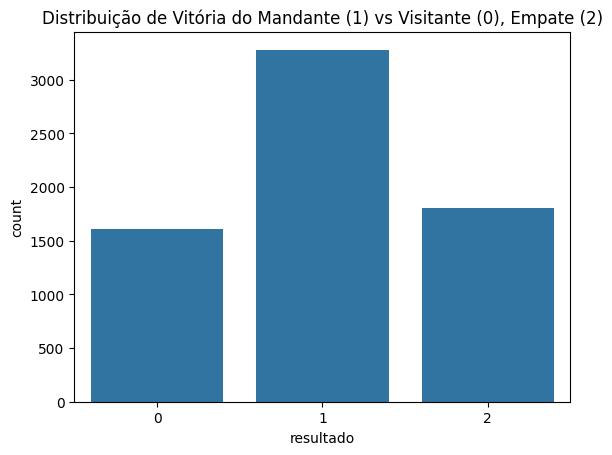

In [10]:
# Verificando a distribuição do resultado da partida (vencedor)
sns.countplot(x='resultado', data=df_selecionado)
plt.title('Distribuição de Vitória do Mandante (1) vs Visitante (0), Empate (2)')
plt.show()

# Verificando a correlação entre as variáveis numéricas
# Selecionando apenas as colunas numéricas para a matriz de correlação
df_numerico = df_selecionado.select_dtypes(include=[np.number])

# Verificando a correlação entre as variáveis numéricas
corr_matrix = df_numerico.corr()


#Step 02: Distribuição com Normalização dos dados

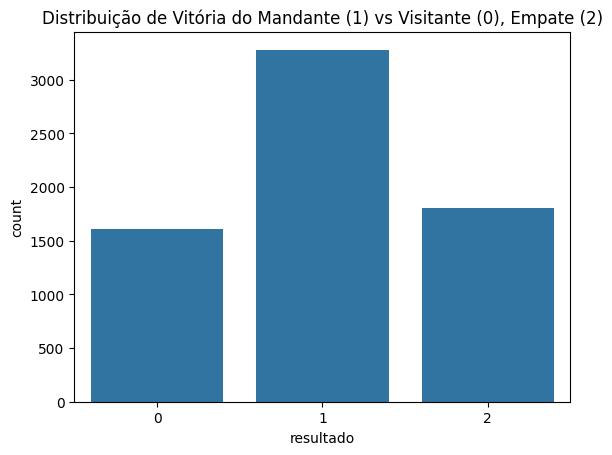

In [11]:
# Verificando a distribuição do resultado da partida (vencedor)
sns.countplot(x='resultado', data=df_selecionado)
plt.title('Distribuição de Vitória do Mandante (1) vs Visitante (0), Empate (2)')
plt.show()

# Selecionando apenas as colunas numéricas para a normalização
df_numerico = df_selecionado.select_dtypes(include=[np.number])

# Normalizando os dados numéricos
scaler = StandardScaler()
df_numerico_scaled = scaler.fit_transform(df_numerico)

# Criando um DataFrame com os dados normalizados
df_numerico_scaled = pd.DataFrame(df_numerico_scaled, columns=df_numerico.columns)

# Calculando a matriz de correlação com os dados normalizados
corr_matrix = df_numerico_scaled.corr()






Não se observou diferenças entre os dados normalizadfos ou não.

#Step 03: Matriz de Correlação

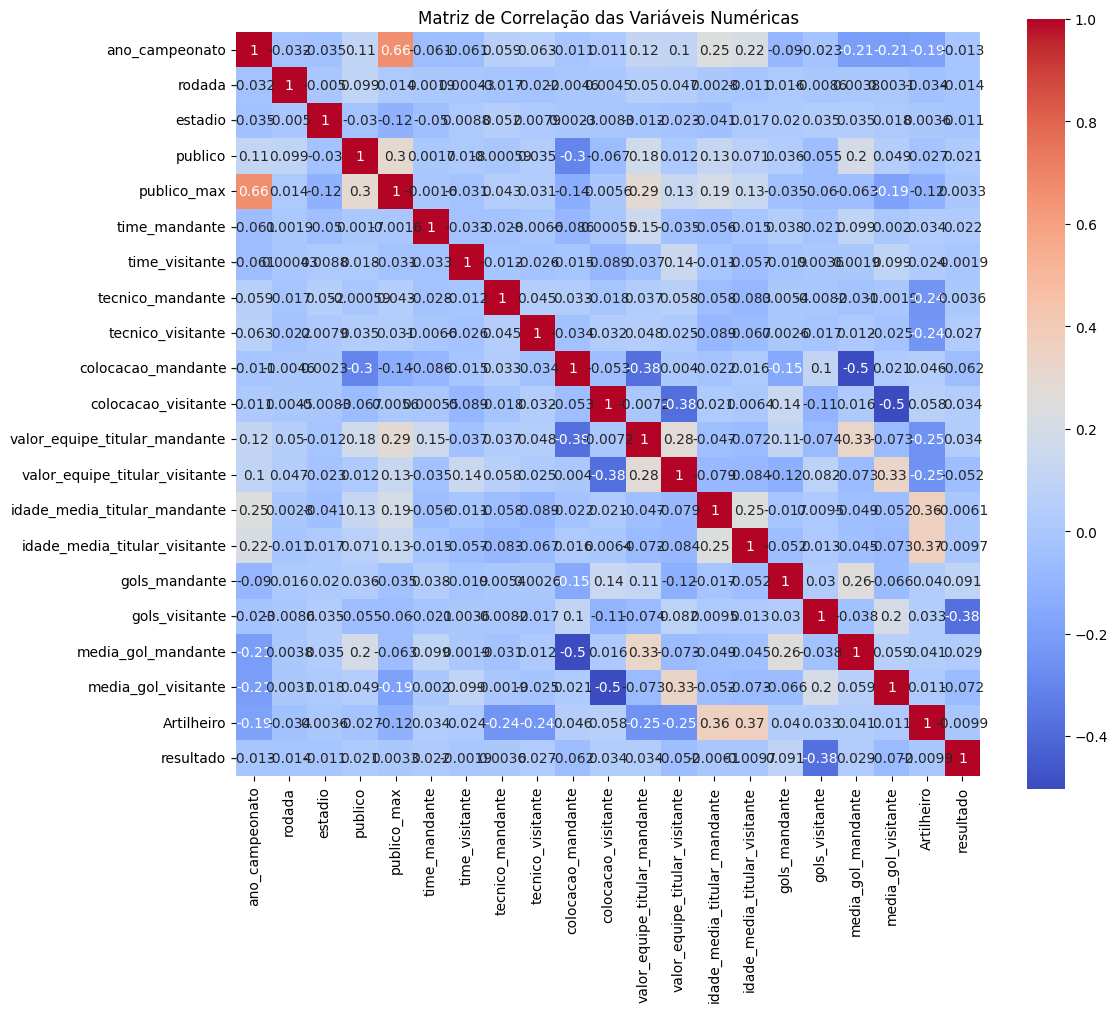

In [12]:

# Exibindo a matriz de correlação com um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


??????

#Step 04: Boxplots das Variáveis

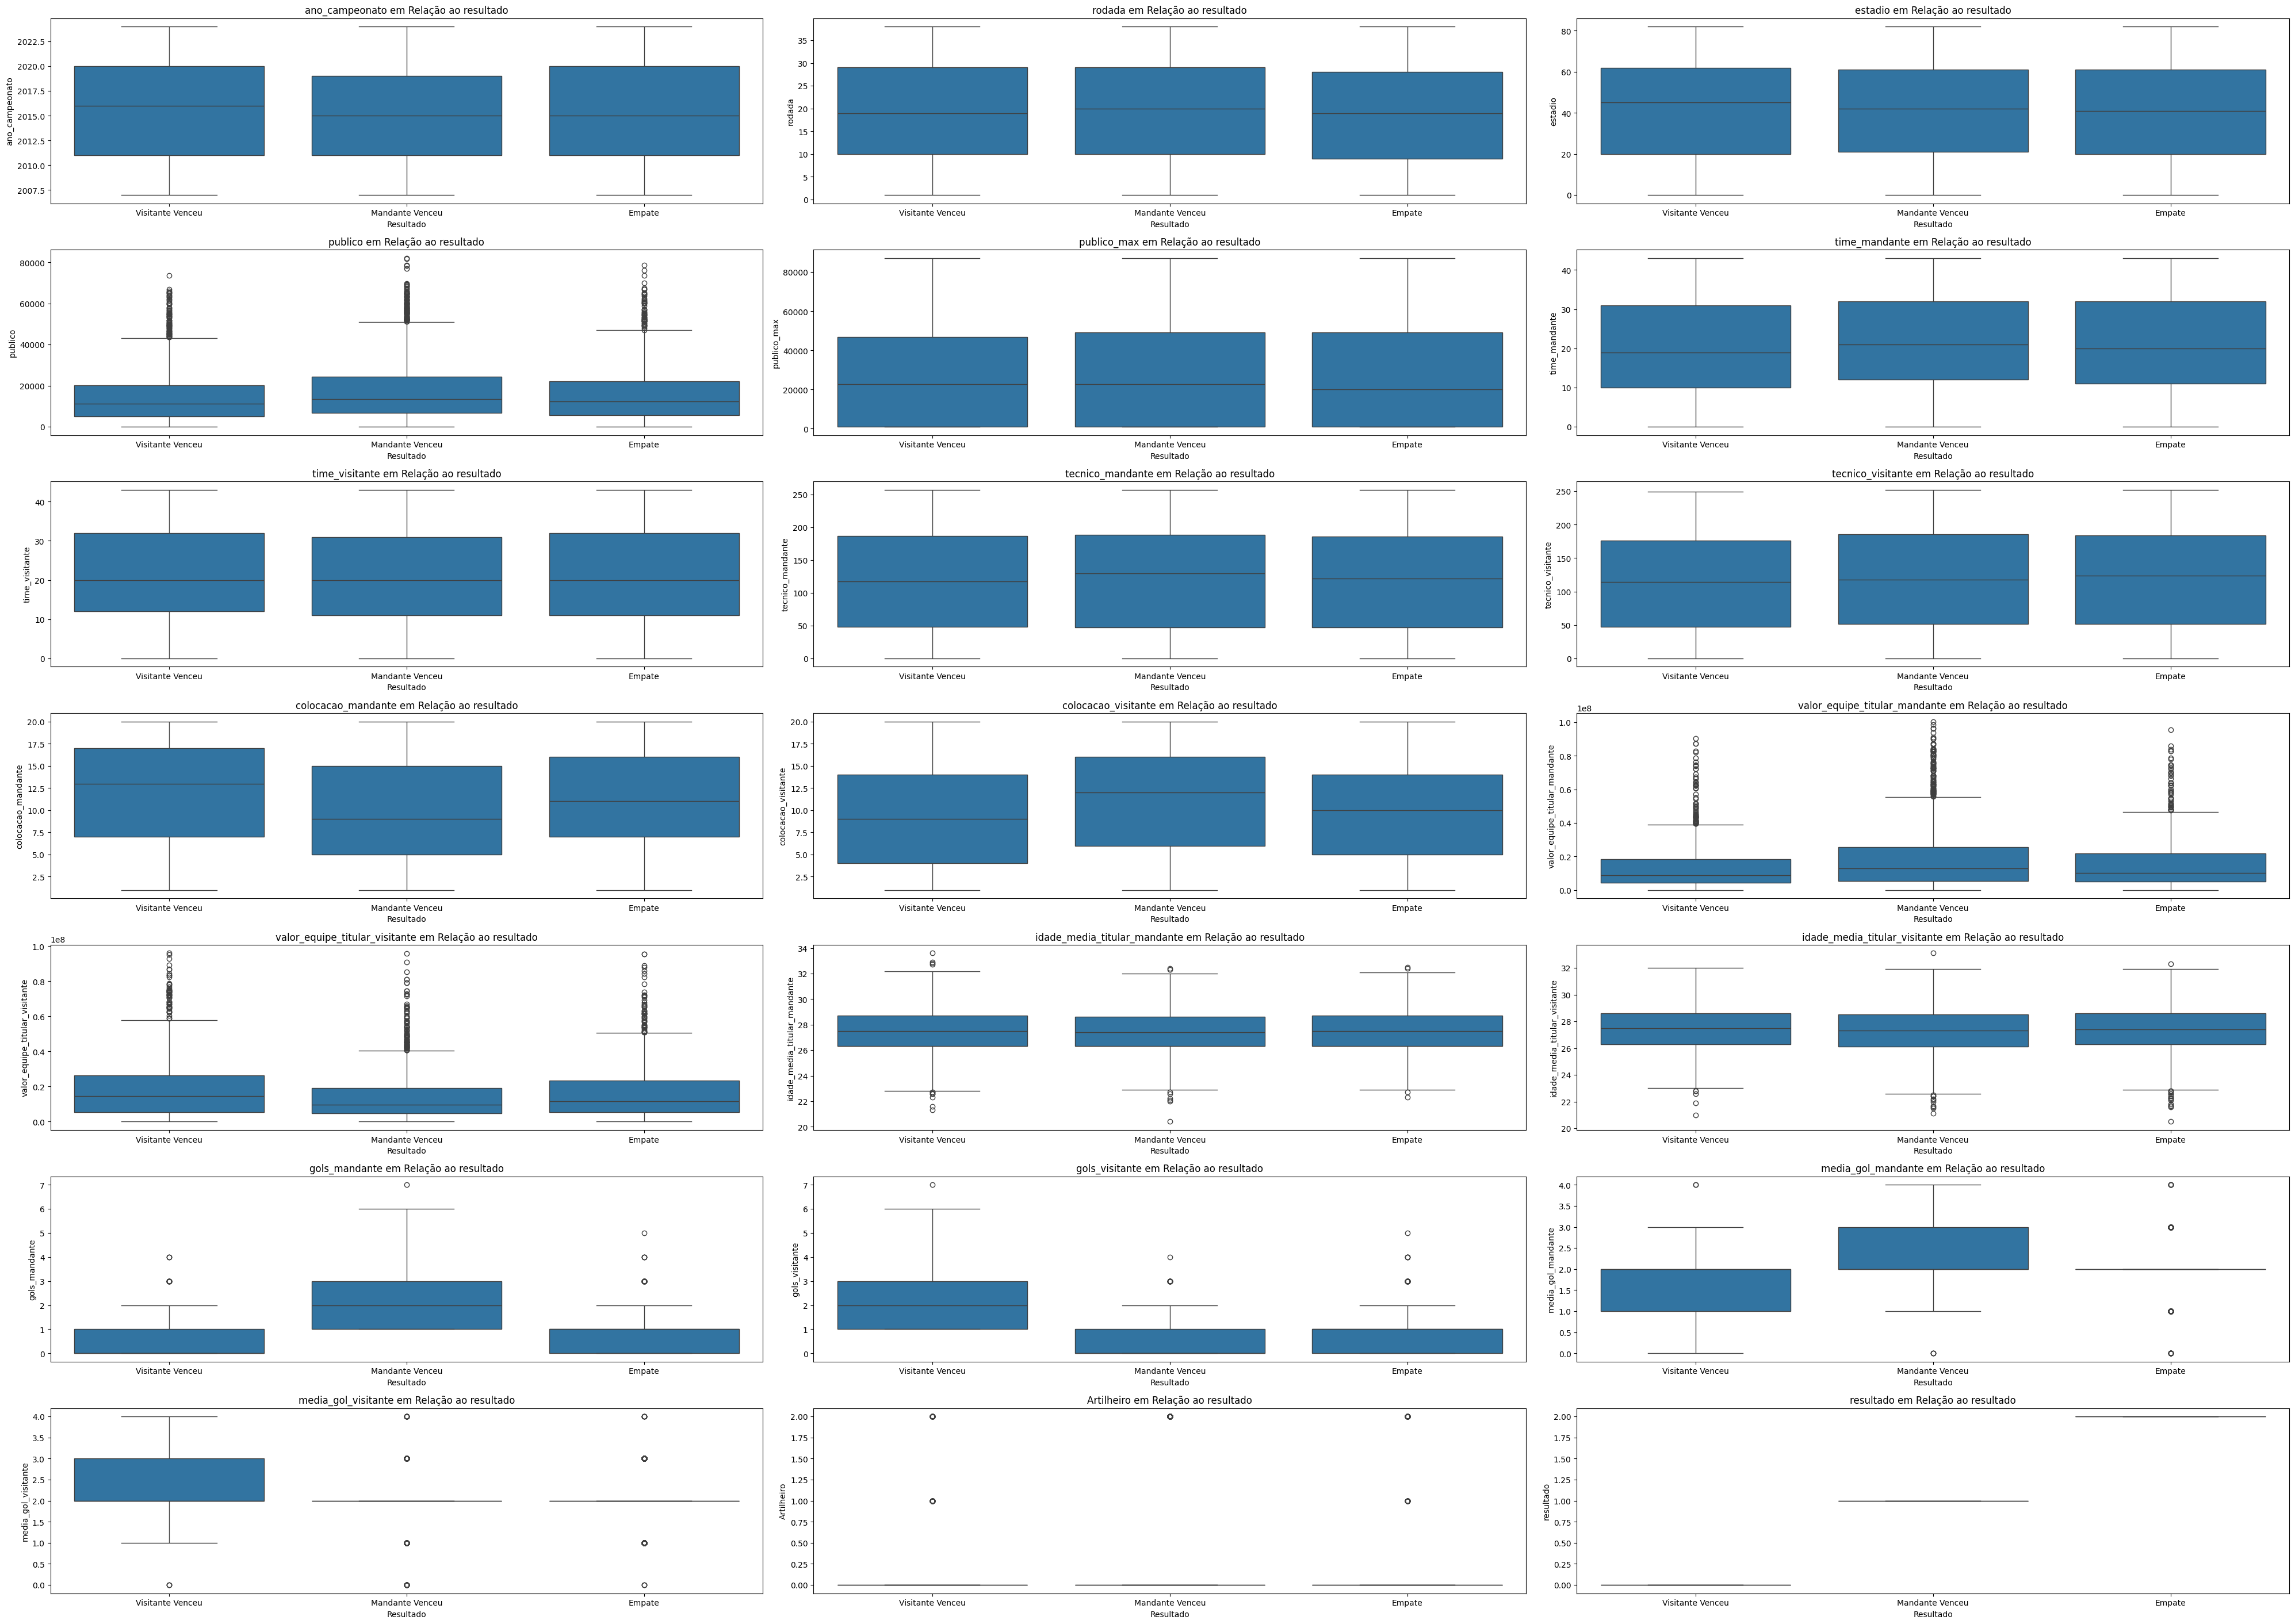

In [13]:
# Definindo as classes para mapeamento do resultado
class_names = {1: "Mandante Venceu", 0: "Visitante Venceu", 2: "Empate"}
df_selecionado["Resultado_Label"] = df_selecionado["resultado"].map(class_names)

# Selecionando apenas as variáveis numéricas para o gráfico
numeric_vars = df_selecionado.select_dtypes(include=[np.number]).columns


# Definindo o tamanho da figura para exibir todos os gráficos
plt.figure(figsize=(40, 40))

# Loop para criar um boxplot para cada variável numérica em relação ao "Resultado"
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(x="Resultado_Label", y=var, data=df_selecionado)
    plt.title(f'{var} em Relação ao resultado')
    plt.xlabel('Resultado')
    plt.ylabel(var)

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()


A análise dos boxplots das variáveis numéricas em relação às categorias ("Mandante Venceu", "Visitante Venceu", "Empate") mostra uma distribuição semelhante entre elas, com alguns valores distantes da maioria. Isso indica que as variáveis numéricas não apresentam uma relação clara com o resultado dos jogos.

<a id="3"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5.1. Escolha do algoritmo:</p>

Nessa etapa vamos fazer a Geração de previsões, cálculo de acurácia, e exibição de métricas e visualizações de desempenho, na busca do melhor modelo para trataiva do problema.

#Step 01: Definição das variáveis de entrada (features) e alvo (target)

In [14]:
# Seleção das variáveis de entrada (features) e alvo (target)

X = df_selecionado[['publico', 'publico_max', 'colocacao_mandante', 'colocacao_visitante',
        'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
        'idade_media_titular_mandante', 'idade_media_titular_visitante',
        'tecnico_mandante', 'tecnico_visitante', 'estadio','media_gol_mandante','media_gol_visitante','Artilheiro']]

          #'arbitro',
         #'gols_1_tempo_mandante','gols_1_tempo_visitante'
        # 'escanteios_mandante','escanteios_visitante','faltas_mandante',
        #'faltas_visitante','chutes_bola_parada_mandante','chutes_bola_parada_visitante','defesas_mandante','defesas_visitante',
        #'impedimentos_mandante','impedimentos_visitante','chutes_mandante','chutes_visitante',
        #'chutes_fora_mandante','chutes_fora_visitante']]



y = df_selecionado['resultado']  # 1 = Mandante vence, 0 = Visitante vence

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos trabalhar com um conjunto reduzido de variaveis, onde foram selecionadas somente as que são importantes a analise.

#Step 02: Exibindo Conjunto de Treinamento e de Testes

In [15]:

print("Dimensões do conjunto de treinamento (features):", X_train.shape)
print("Dimensões do conjunto de teste (features):", X_test.shape)
print("Dimensões do conjunto de treinamento (Resultado):", y_train.shape)
print("Dimensões do conjunto de teste (Resultado):", y_test.shape)


Dimensões do conjunto de treinamento (features): (5353, 14)
Dimensões do conjunto de teste (features): (1339, 14)
Dimensões do conjunto de treinamento (Resultado): (5353,)
Dimensões do conjunto de teste (Resultado): (1339,)


#Step 03: Aplicação dos Modelos

Para problemas de classificação, onde o nosso objetivo é prever categorias, se "mandante vence" ou "visitante vence", vamos usar os modelos mais comuns para problemas de classificação:



**1. Regressão Logística (Logistic Regression)**
Descrição: Modelo simples, mas eficaz para problemas de classificação Ele estima a probabilidade de uma classe com base em uma função logística.

Quando usar: Quando o problema de classificação é simples, com um número razoável de características e as classes são aproximadamente linearmente separáveis.

Vantagens: Fácil de interpretar e rápido de treinar

**2. Árvore de Decisão (Decision Tree)**
Descrição: Um modelo de árvore hierárquica, divide os dados em subgrupos com base em decisões binárias.

Quando usar: Quando você deseja um modelo interpretável e seus dados têm relações não lineares.

Vantagens: Fácil de entender, não requer normalização dos dados.


**3. Random Forest**
Descrição: Um conjunto de árvores de decisão que melhora a precisão do modelo, combinando a previsão de várias árvores.

Quando usar: Quando você precisa de um modelo mais robusto que possa lidar com dados de alta dimensão e relações complexas, sem overfitting.

Vantagens: Boa performance em muitos problemas, robusto ao overfitting, pode lidar com grandes volumes de dados.

**4. Support Vector Machine (SVM)**
Descrição: Modelo de classificação baseado em encontrar um hiperplano que separa as classes com a maior margem possível.

Quando usar: Quando as classes são separáveis ou quase separáveis linearmente, ou quando há uma complexidade maior no conjunto de dados.

Vantagens: Pode ser muito eficaz em problemas complexos e de alta dimensão, especialmente com o uso de diferentes kernels (linear, RBF, polinômio).



**5. k-Nearest Neighbors (KNN)**
Descrição: Modelo baseado na proximidade dos dados. A classificação de uma instância é feita pela maioria dos vizinhos mais próximos.

Quando usar: Para problemas onde a similaridade entre as instâncias é importante e quando você tem muitos dados de treino.

Vantagens: Simples de entender e implementar, não requer treinamento explícito.

**6. Naive Bayes**
Descrição: Modelo probabilístico baseado no teorema de Bayes, que assume independência entre as features.

Quando usar: Quando as features são independentes (ou quase independentes) entre si. É muito eficiente para grandes conjuntos de dados e é comum em problemas de texto (classificação de e-mails, por exemplo).

Vantagens: Rápido, eficiente e bom para dados com muitas classes.


**7. Gradient Boosting (eXtreme Gradient Boosting - XGBoost)**
Descrição: Um algoritmo de ensemble que usa árvores de decisão para combinar modelos fracos e melhorar a performance. XGBoost é uma implementação eficiente e popular.

Quando usar: Quando você tem muitos dados e precisa de um modelo que lide bem com interações complexas e dados desequilibrados.

Vantagens: Alta performance, bom para dados desbalanceados, pode ser ajustado de várias formas.


** **

 Esses algoritmos foram escolhidos pela eficácia em lidar com problemas de classificação.  Vamos comparar os resultados obtidos por cada um dos algoritmos, selecionar o melhor e, aprimorá-lo com a utilização de hiperparâmetros.

In [16]:
# Instanciando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
# Fazendo previsões
y_pred_log = log_reg.predict(X_test)
# Avaliação do modelo
print("Acurácia - Regressão Logística:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("-" * 55)

# Instanciando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_rf = rf_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("-" * 55)


# Instanciando o modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

print("-" * 55)


# Instanciando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_dt = dt_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - Árvore de Decisão:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("-" * 55)

# Instanciando Scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Instanciando o modelo de KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_knn = model_knn.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - K-Nearest Neighbors:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("-" * 55)

# Criando e treinando o modelo
model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_svm = model_svm.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - Support Vector Machine (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("-" * 55)


# Instanciando o modelo Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
# Fazendo previsões
y_pred_nb = model_nb.predict(X_test)
# Avaliação do modelo
print("Acurácia - Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Acurácia - Regressão Logística: 0.515309932785661
              precision    recall  f1-score   support

           0       0.45      0.21      0.28       329
           1       0.52      0.95      0.67       658
           2       0.00      0.00      0.00       352

    accuracy                           0.52      1339
   macro avg       0.32      0.38      0.32      1339
weighted avg       0.37      0.52      0.40      1339

-------------------------------------------------------
Acurácia - Random Forest: 0.4899178491411501
              precision    recall  f1-score   support

           0       0.40      0.24      0.30       329
           1       0.54      0.80      0.65       658
           2       0.28      0.13      0.18       352

    accuracy                           0.49      1339
   macro avg       0.41      0.39      0.38      1339
weighted avg       0.44      0.49      0.44      1339

-------------------------------------------------------
Acurácia - XGBoost: 0.474981329

Vamos avaliar os resultados obtidos por cada modelo na tarefa de classificação do "resultado" de uma partida.

** **
**1. Regressão Logística**

**Acurácia:** 51.53%

**Precision/Recall para Classe 1 (Vitória Mandante):** A Reg. Logística tem um bom recall (0.95) para a classe 1 (Vitória Mandante), indicando que ele é bastante eficaz em prever quando o mandante vence, mas a precisão é um pouco baixa (0.52), o que significa que algumas previsões de vitória do mandante são incorretas. A classe 2 (Empate) não é bem identificada, com ambos precision e recall sendo 0.

**F1-Score:** O modelo tem um bom F1-score (0.67) para a classe 1, mas a classe 2 tem um F1 de 0, o que sugere que o modelo falha em prever empates.

** **

**2. Random Forest**

**Acurácia:** 48.99%

**Precision/Recall para Classe 1 (Vitória Mandante):** Similar à Regressão Logística, o modelo tem precisão de 0.54 e recall de 0.80 para a classe 1, o que significa que ele acerta boa parte dos casos de vitória do mandante, mas também tem muitos falsos positivos (erro de previsão). O recall para a classe 2 (empates) é fraco.

**F1-Score:** O F1 para a classe 1 é razoável (0.65), mas novamente, para a classe 2, o F1-score é muito baixo (0.18).

** **

**3. XGBoost**

**Acurácia:** 47.50%

**Precision/Recall para Classe 1 (Vitória Mandante):** O XGBoost tem uma boa precisão (0.56) e recall (0.71) para a classe 1, mas como os outros modelos, não é muito bom em prever empates (classe 2), com recall de 0.23 e precisão de 0.32.

**F1-Score:** O modelo tem um bom F1-score de 0.62 para a classe 1, mas novamente o desempenho para a classe 2 é fraco.


** **

**4. Árvore de Decisão**

**Acurácia:** 39.21%

**Precision/Recall para Classe 1 (Vitória Mandante):** O modelo tem um desempenho inferior nos dados, com um F1-score médio para a classe 1 (0.50), e um desempenho mais baixo para as classes 0 (Visitante vence) e 2 (Empate).

**F1-Score:** A árvore de decisão é o modelo com o pior desempenho para as classes 0 e 2, mas tem um desempenho razoável para a classe 1.


** **

**5. K-Nearest Neighbors (KNN)**

**Acurácia:** 43.91%

**Precision/Recall para Classe 1 (Vitória Mandante):** O KNN tem uma precisão razoável para a classe 1 (0.54) e um recall de 0.67. Ele também não é eficaz para prever empates.

**F1-Score:** O modelo é similar à árvore de decisão, com bom desempenho para a classe 1 mas desempenho baixo para as classes 0 e 2.


** **

**6. Support Vector Machine (SVM)**

**Acurácia:** 50.93%

**Precision/Recall para Classe 1 (Vitória Mandante):** O SVM tem uma precisão de 0.53 e recall de 0.92 para a classe 1, o que significa que ele acerta a maioria das vitórias do mandante, mas com muitas previsões incorretas para outras classes. O desempenho para a classe 2 (empate) continua sendo muito fraco.

**F1-Score:** O F1-score para a classe 1 é bom (0.67), mas o desempenho para a classe 2 é extremamente baixo, com F1-score de 0.05.


** **

**7. Naive Bayes**

**Acurácia:** 50.19%

**Precision/Recall para Classe 1 (Vitória Mandante):** O modelo Naive Bayes tem um bom recall para a classe 1 (0.94), mas a precisão é baixa (0.51). Para a classe 2, o modelo falha completamente, sem previsões corretas.

**F1-Score:** Similar a outros modelos, o F1-score para a classe 1 é bom (0.66), mas a classe 2 não é prevista corretamente.

** **

**Conclusões e Considerações**
Desbalanceamento de Classes: A maioria dos modelos tem dificuldade com a classe 2 (empate), o que pode ser devido ao desbalanceamento de classes no dataset. Para melhorar o desempenho, vamos tentar uma técnica oversampling (SMOTE) para equilibrar as classes antes de treinar o modelo.


#Step 04: Aplicando normalização nos 3 modelos com melhores resultados

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("-" * 55)

# Instanciando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_log = log_reg.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - Regressão Logística:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("-" * 55)

# Instanciando o modelo de SVM
# Criando e treinando o modelo
model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_svm = model_svm.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - Support Vector Machine (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("-" * 55)

# Instanciando o modelo Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_nb = model_nb.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))




-------------------------------------------------------
Acurácia - Regressão Logística: 0.5235250186706497
              precision    recall  f1-score   support

           0       0.46      0.27      0.34       329
           1       0.54      0.91      0.68       658
           2       0.45      0.04      0.07       352

    accuracy                           0.52      1339
   macro avg       0.48      0.41      0.36      1339
weighted avg       0.49      0.52      0.43      1339

-------------------------------------------------------
Acurácia - Support Vector Machine (SVM): 0.5093353248693054
              precision    recall  f1-score   support

           0       0.46      0.20      0.28       329
           1       0.53      0.92      0.67       658
           2       0.21      0.03      0.05       352

    accuracy                           0.51      1339
   macro avg       0.40      0.38      0.34      1339
weighted avg       0.43      0.51      0.41      1339

---------------

**1. Regressão Logística**

**Acurácia: 52.35%**

**Precision/Recall Para Classe 1 (Vitória Mandante):**
A Regressão Logística tem um bom recall de 0.91 para a classe 1 (Vitória Mandante), o que significa que o modelo acerta a maioria dos casos de vitória do mandante. Porém, a precisão de 0.54 indica que algumas previsões de vitória do mandante são incorretas. A classe 2 (Empate) tem um desempenho fraco, com recall de apenas 0.04, o que sugere que o modelo falha completamente em identificar empates.

**F1-Score:** O modelo tem um F1-score razoável de 0.68 para a classe 1, mas o F1-score para a classe 2 é muito baixo (0.07), indicando que a classe de empates é muito mal representada.

** **

**2. Support Vector Machine (SVM)**

**Acurácia: 50.93%**

**Precision/Recall para Classe 1 (Vitória Mandante):** O SVM tem um recall bom de 0.92 para a classe 1 (Vitória Mandante), o que significa que ele consegue identificar a maioria dos casos de vitória do mandante. No entanto, a precisão de 0.53 indica que o modelo também faz muitos erros ao prever vitórias do mandante. A classe 2 (Empate) é novamente mal prevista, com recall de 0.03, o que é muito baixo.

**F1-Score:** O modelo tem um F1-score razoável de 0.67 para a classe 1, mas o F1-score para a classe 2 é quase nulo (0.05), o que indica que a classe de empate não está sendo corretamente identificada.

** **

**3. Naive Bayes**

**Acurácia: 49.51%**

**Precision/Recall para Classe 1 (Vitória Mandante):** O Naive Bayes apresenta uma precisão de 0.55 e recall de 0.76 para a classe 1 (Vitória Mandante). Isso significa que ele consegue identificar bem as vitórias do mandante, mas ainda assim, a precisão é inferior em relação ao recall. Para a classe 2 (Empate), o modelo tem um recall muito baixo de 0.08 e precisão de 0.30, o que sugere que ele está fazendo muitas previsões incorretas para empates.

**F1-Score:** O F1-score para a classe 1 é 0.64, o que é razoável, mas o F1-score para a classe 2 é muito baixo (0.13), o que reflete a falha em prever empates.


** **

**Conclusões e Observações:**

Modelo Sólido para a Classe 1 (Vitória Mandante): Todos os modelos têm um desempenho relativamente bom na previsão de vitórias do mandante (classe 1), com recall alto (acertando a maioria dos casos) mas com precisão que poderia ser melhorada.

Baixo Desempenho para a Classe 2 (Empate): A maior dificuldade está em prever a classe 2 (Empate). Todos os modelos têm recall muito baixo (menos de 0.1) para essa classe, o que sugere que essa classe pode estar sub-representada no conjunto de dados, ou os modelos não conseguem identificar padrões suficientes para prever empates com precisão.

Desbalanceamento de Classes: Parece haver um desbalanceamento de classes, o que pode estar impactando o desempenho. O modelo está mais "preocupado" em identificar vitórias do mandante (classe 1), mas falha na previsão dos empates.
Acurácia Geral: Embora a acurácia esteja razoavelmente boa (entre 50-52%), o desempenho nas classes desbalanceadas, principalmente a classe 2, precisa ser melhorado. A acurácia não é o melhor indicador aqui, já que ela pode ser enganada pelo forte desempenho nas classes majoritárias (classe 1).


**Melhorias:**

1 - Vamos utilizar a Técnica SMOTE para tentar melhorar a identificação da classe 2.

2 - Ajustes de Hiperparâmetros para tentar um desempenho mais robusto.

3 - Experimentar Outros Modelos que podem lidar melhor com dados desbalanceados. Como Gradient Boosting ou CatBoost,




#Step 05: Balanceamento de Classes


Como a classe de empate está sendo muito mal predita, vamos aplicar técnicas de balanceamento, utilizando oversampling para aumentar a quantidade da classe minoritária e melhorar a predição.

In [18]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Definindo os modelos
models = {
    "Regressão Logística": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dicionário para salvar resultados
model_results = {}

# Treinando e avaliando os modelos
for model_name, model in models.items():
    print(f"Avaliando {model_name}...")

    # Criando o pipeline com SMOTE
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    # Treinando o modelo
    pipeline.fit(X_train_smote, y_train_smote)  # Use o pipeline com SMOTE

    # Fazendo previsões
    y_pred = pipeline.predict(X_test)

    # Avaliando o modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[model_name] = {'pipeline': pipeline, 'y_pred': y_pred, 'accuracy': accuracy, 'report': report}

    print(f"Acurácia - {model_name}: {accuracy}")
    print(classification_report(y_test, y_pred))

    print("-" * 55)


    # Salvando resultados e previsões para o segundo script
    joblib.dump(model_results, 'model_results.pkl')
    print("Modelos e resultados salvos em 'model_results.pkl'.")

Avaliando Regressão Logística...
Acurácia - Regressão Logística: 0.4406273338312173
              precision    recall  f1-score   support

           0       0.32      0.47      0.38       329
           1       0.56      0.60      0.58       658
           2       0.28      0.11      0.16       352

    accuracy                           0.44      1339
   macro avg       0.38      0.39      0.37      1339
weighted avg       0.43      0.44      0.42      1339

-------------------------------------------------------
Modelos e resultados salvos em 'model_results.pkl'.
Avaliando Random Forest...
Acurácia - Random Forest: 0.4548170276325616
              precision    recall  f1-score   support

           0       0.34      0.33      0.33       329
           1       0.57      0.61      0.59       658
           2       0.31      0.28      0.29       352

    accuracy                           0.45      1339
   macro avg       0.41      0.41      0.41      1339
weighted avg       0.45      

**1. Regressão Logística**

**Acurácia: 0.44 (44%) Análise:** O modelo apresentou uma boa precisão (56%) para a classe 1 (vitória do mandante), mas o recall é bem menor (60%), indicando que ele não captura bem todos os casos de vitória do mandante. A classe 2 (empate) tem um desempenho muito ruim, com precisão de apenas 28% e recall de 11%. O modelo tem dificuldade em classificar corretamente a classe minoritária (empate).

** **

**2. Random Forest**

**Acurácia: 0.46 (46%) Análise:** A classe 1 ainda é bem classificada, com precisão de 57% e recall de 63%, mas a classe 2 (empate) continua com um desempenho ruim (precisão de 30%, recall de 25%).
O modelo parece melhorar a captura de vitórias do mandante (classe 0) em comparação com a regressão logística.


Recomendação: Embora o modelo tenha um desempenho melhor que a regressão logística, ele ainda precisa de ajustes para melhorar o desempenho na classe 2.

** **

**3. SVM (Support Vector Machine)**

**Acurácia: 0.42 (42%) Análise:** O SVM tem um desempenho razoável para a classe 0 (visitante vence), com recall de 62%, mas falha em classificar corretamente os empates (classe 2), com recall de apenas 14%. A classe 1 tem um recall de 46%, o que indica uma boa capacidade de detectar vitórias do mandante, mas o modelo é fraco na identificação dos empates.

Recomendação: Considerar ajustes no modelo para aumentar a performance na classe 2.

** **

**4. K-Nearest Neighbors (KNN)**

**Acurácia: 0.36 (36%) Análise:** O modelo teve o pior desempenho geral, com recall baixo tanto para a classe 0 (43%) quanto para a classe 2 (24%).
A classe 1 também apresenta um recall de apenas 38%, o que indica uma grande dificuldade em capturar a vitória do mandante.

Recomendação: O modelo KNN não está performando bem para esse problema e pode ser descartado ou reavaliado com ajustes significativos.

** **

**5. Árvore de Decisão**

**Acurácia: 0.37 (37%) Análise:** A Árvore de Decisão apresenta um desempenho um pouco melhor que o KNN, mas ainda muito inferior aos outros modelos.
O recall para a classe 0 é de 31%, e para a classe 2, de 32%. Isso indica que o modelo não está conseguindo distinguir bem entre as classes.

Recomendação: Ajustar parâmetros da árvore de decisão (profundidade máxima, número de amostras por folha, etc.) pode ajudar, mas o modelo não está mostrando um bom desempenho.

** **

**6. Naive Bayes**

**Acurácia: 0.39 (39%) Análise:** O modelo Naive Bayes tem um desempenho intermediário, com um recall de 59% para a classe 0, mas apenas 38% para a classe 1 e 22% para a classe 2.
A precisão é razoável para a classe 1 (57%), mas o recall de 38% indica que ele perde muitas vitórias do mandante.

** **

Recomendação: O Naive Bayes também pode ser ajustado ou substituído por outro modelo mais robusto para melhorar o desempenho geral.
Resumo Geral:

Melhor Desempenho: O Random Forest apresentou a melhor acurácia entre os modelos (46%), seguido pela Regressão Logística (44%). Ambos têm um desempenho razoável na identificação da vitória do mandante (classe




1), mas ambos falham em classificar corretamente os empates (classe 2).
Desempenho Ruim: O KNN e a Árvore de Decisão apresentaram os piores resultados, com a KNN obtendo apenas 36% de acurácia e a Árvore de Decisão 37%. Ambos falharam em capturar corretamente todas as classes.
SMOTE ajudou a balancear as classes, mas os modelos ainda precisam de ajustes para melhorar o desempenho na classe 2 (empate).



Recomendações:
Ajustar os Modelos: Tentar ajustar os hiperparâmetros, como o número de árvores para o Random Forest, ou a regularização para a Regressão Logística e SVM.

Reavaliar o KNN e a Árvore de Decisão: Talvez o KNN e a Árvore de Decisão não sejam adequados para esse tipo de problema, ou seja, necessário um ajuste mais fino nesses modelos.
Considerar Outros Modelos: Vale a pena tentar modelos mais avançados, como XGBoost ou LightGBM, que podem ser mais eficazes nesse tipo de tarefa.

#Step 06: Matriz de Confusão

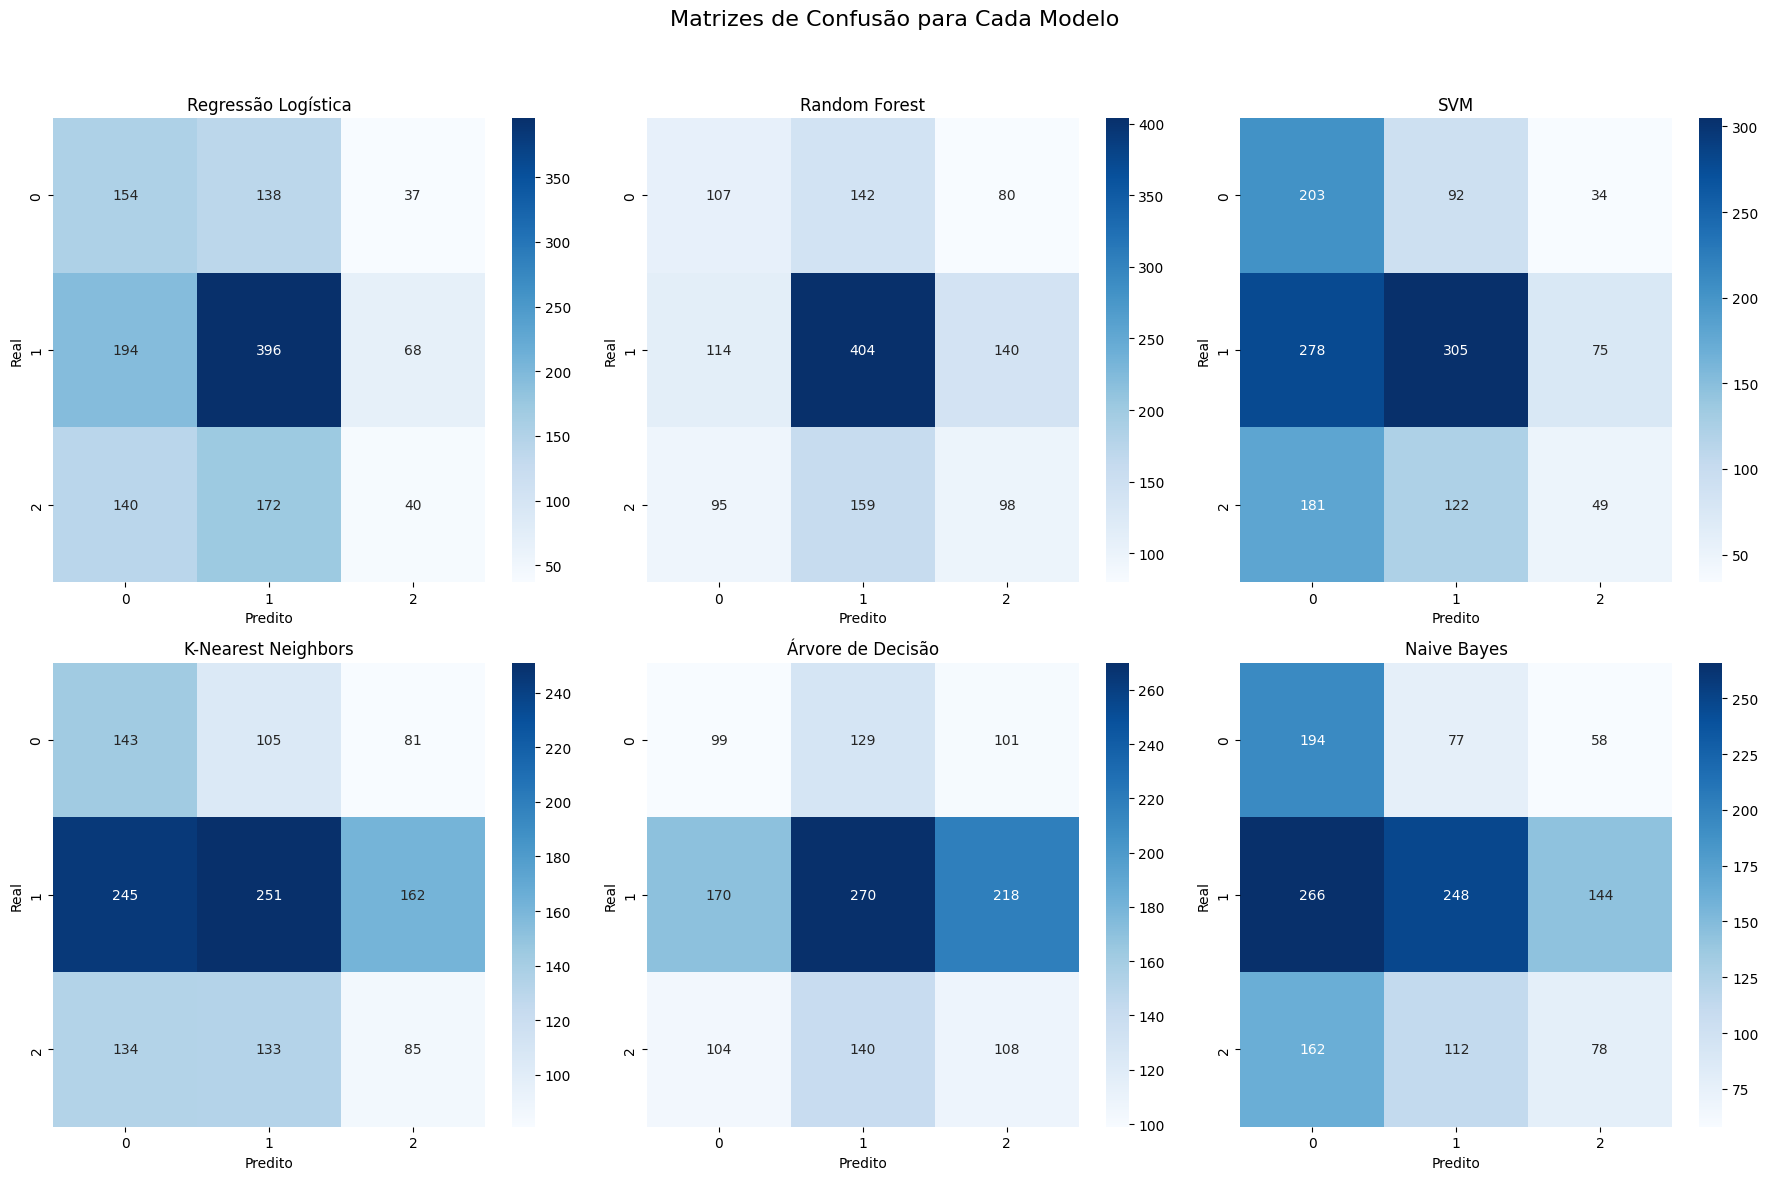

In [19]:
# Script separado: plot_confusion_matrices.py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Carregar os resultados dos modelos
model_results = joblib.load('model_results.pkl')

# Configurar a figura para 2 linhas e 3 colunas
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Matrizes de Confusão para Cada Modelo', fontsize=16)

# Plotar cada matriz de confusão em um subplot
for idx, (model_name, result) in enumerate(model_results.items()):
    y_pred = result['y_pred']
    cm = confusion_matrix(y_test, y_pred)

    # Calcular a posição do subplot
    row = idx // 3
    col = idx % 3

    # Plotar a matriz de confusão no subplot específico
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2], ax=axs[row, col])
    axs[row, col].set_title(f'{model_name}')
    axs[row, col].set_xlabel('Predito')
    axs[row, col].set_ylabel('Real')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deixa espaço para o título principal
plt.show()

**1. Regressão Logística**

Classe 0: O modelo teve uma boa taxa de acerto para a classe 0, com 154 exemplos corretamente classificados. No entanto, há um número considerável de confusões com a classe 1 (138) e 37 com a classe 2. Isso sugere que a classe 0 tem alguma dificuldade de distinção com as classes 1 e 2.

Classe 1: O modelo teve um bom desempenho em prever a classe 1, com 396 acertos, mas também houve algumas confusões, especialmente com a classe 0 (194) e 68 com a classe 2.

Classe 2: A classe 2 foi a mais mal predita, com apenas 40 acertos, enquanto foi confundida com as outras classes (172 com a classe 1 e 140 com a classe 0).


**2. Random Forest**

Classe 0: A classe 0 teve 111 exemplos corretamente classificados, mas foi frequentemente confundida com a classe 1 (146) e a classe 2 (72).

Classe 1: O modelo teve um bom desempenho para a classe 1, com 412 acertos, mas ainda assim com confusões, especialmente com a classe 0 (121) e 125 com a classe 2.

Classe 2: A classe 2 também sofreu para ser predita corretamente, com apenas 91 acertos. Houve confusão com a classe 1 (169) e com a classe 0 (92).


**3. SVM**


Classe 0: A classe 0 foi bem prevista com 203 acertos, mas houve confusão com a classe 1 (92) e 34 com a classe 2.


Classe 1: A classe 1 teve um bom número de acertos (305), mas também foi confundida com a classe 0 (278) e a classe 2 (75).


Classe 2: A classe 2 teve 49 acertos, com algumas confusões, especialmente com a classe 1 (122) e com a classe 0 (181).


**4. K-Nearest Neighbors**


Classe 0: A classe 0 teve 143 acertos, mas foi confundida com as outras duas classes (105 com a classe 1 e 81 com a classe 2).

Classe 1: A classe 1 teve 251 acertos, mas com confusões consideráveis, especialmente com a classe 0 (245) e a classe 2 (162).

Classe 2: A classe 2 teve 85 acertos, com confusões com a classe 1 (133) e a classe 0 (134).


**5. Árvore de Decisão**

Classe 0: A classe 0 teve 103 acertos, com uma quantidade razoável de confusão com as outras classes (134 com a classe 1 e 92 com a classe 2).

Classe 1: A classe 1 teve 270 acertos, mas também foi confundida com a classe 0 (175) e a classe 2 (213).

Classe 2: A classe 2 teve 107 acertos, com confusões com as
classes 1 (148) e 0 (97).


**6. Naive Bayes**


Classe 0: A classe 0 teve 194 acertos, mas foi confundida com a classe 1 (77) e 58 com a classe 2.


Classe 1: A classe 1 teve 248 acertos, mas também foi confundida com a classe 0 (266) e a classe 2 (144).


Classe 2: A classe 2 teve 78 acertos, com confusões com as classes 1 (112) e 0 (162).


**Conclusão:**

Classe 0 (Vitória do mandante):

A classe 0 foi frequentemente confundida com as outras duas classes em todos os modelos, mas ainda assim teve uma taxa de acerto razoável.

A maior parte das confusões ocorre com a classe 1, indicando que o modelo pode ter dificuldade em distinguir vitórias do mandante de vitórias do visitante.

Classe 1 (Vitória do visitante):

A classe 1 geralmente foi bem predita, mas com algumas confusões com as classes 0 e 2. Isso sugere que o modelo tem uma performance razoável em identificar vitórias do visitante, mas ainda há casos de confusão com empates.


Classe 2 (Empate):

A classe 2 (empate) foi a mais difícil de ser predita em todos os modelos, mostrando um número considerável de erros em suas previsões, com valores de recall baixos (menos de 0.20 para alguns modelos). Isso sugere que a classe de empate está sub-representada ou que seus padrões não estão sendo capturados adequadamente pelos modelos.
Esse comportamento é um indicativo de que um balanceamento de classes, como o oversampling ou undersampling, pode ser necessário para melhorar a performance da classe de empate.

**Conclusões:**

Desempenho variável: Todos os modelos mostraram maior sucesso em predizer a classe 1 (vitória do visitante), enquanto a classe 0 (vitória do mandante) e, especialmente, a classe 2 (empate) foram mais difíceis de classificar corretamente.
Necessidade de balanceamento: Como a classe de empate (2) apresenta um desempenho muito baixo, aplicar técnicas de balanceamento (como SMOTE ou undersampling) pode ser essencial para melhorar a acurácia e recall dessa classe.

<a id="4"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">6.1. Otimização do modelo:</p>

Nessa etapa , vamos buscar por hiperparâmetros usando o GridSearchCV e  o RandomSearch pra encontrar a combinação de parâmetros que maximiza a acurácia.

Random Search é uma técnica para encontrar os melhores hiperparâmetros do modelo SVM, usando o método de busca aleatória (RandomizedSearchCV). Ao invés de testar exaustivamente todas as combinações de hiperparâmetros (como o GridSearchCV), o RandomizedSearchCV escolhe aleatoriamente combinações de hiperparâmetros dentro de um espaço definido, permitindo um ajuste mais rápido e menos custoso computacionalmente.

# Step 01: SVM com Grid Search

Faz uma busca exaustiva sobre um conjunto de parâmetros especificados para o modelo. Ele vai testar todas as combinações possíveis desses parâmetros.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir o modelo
model_svm = SVC()

# Definir o grid de hiperparâmetros a serem testados
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Configurar o Grid Search com validação cruzada
grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)

# Ajustar o Grid Search nos dados de treino
grid_search.fit(X_train_scaled, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_

# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test_scaled)
print("Acurácia - SVM com Grid Search:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

**Melhores hiperparâmetros: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}**

Acurácia - SVM com Grid Search: 0.513816280806572
              precision    recall  f1-score   support

           0       0.45      0.20      0.28       329
           1       0.53      0.92      0.68       658
           2       0.30      0.05      0.09       352

    accuracy                           0.51      1339
   macro avg       0.43      0.39      0.35      1339
weighted avg       0.45      0.51      0.42      1339

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Modelo SVM
model_svm = SVC()

# Grid de hiperparâmetros (refinado para maior eficiência)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']  # Mantendo apenas os kernels mais comuns
}

# Grid Search com validação cruzada e paralelismo
grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=5,
                           scoring='accuracy', verbose=1, n_jobs=-1)

# Ajuste do Grid Search
grid_search.fit(X_train_scaled, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_

# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test_scaled)
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


# Step 02: SVM com Random Search  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Definir o modelo
model_svm = SVC()


# Definir o grid de hiperparâmetros a serem testados
param_distributions = {
    'C': uniform(0.1, 100),       # Escolher valores aleatórios para C no intervalo (0.1, 100)
    'gamma': uniform(0.001, 1),   # Escolher valores aleatórios para gamma no intervalo (0.001, 1)
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Configurar o Random Search com validação cruzada
random_search = RandomizedSearchCV(estimator=model_svm, param_distributions=param_distributions, n_iter=50, cv=5, scoring='accuracy', random_state=42, verbose=0)

# Ajustar o Random Search nos dados de treino
random_search.fit(X_train_scaled, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", random_search.best_params_)

# Modelo com os melhores hiperparâmetros
best_model = random_search.best_estimator_

# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test_scaled)
print("Acurácia - SVM com Random Search:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ss

In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Modelo
model_svm = SVC()

# Hiperparâmetros reduzidos
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01],
    'kernel':  ['rbf', 'linear', 'poly', 'sigmoid']
}

# RandomizedSearch com 10 combinações e paralelismo
random_search = RandomizedSearchCV(estimator=model_svm, param_distributions=param_grid,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=0)

# Treinamento
random_search.fit(X_train_scaled, y_train)

# Resultados
print("Melhores hiperparâmetros:", random_search.best_params_)
best_model = random_search.best_estimator_

# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test_scaled)
print("Acurácia - SVM com Randomized Search:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'X_train_scaled' is not defined

Como podemos observar, os resultados com a utilização de hiperparâmetros foram piores, tanto em termos de acurácia quanto de precisão das classes. O modelo apresentou dificuldades especialmente na identificação da classe 1.

<a id="5"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">7.1. Avaliação dos resultados:</p>

Nessa etapa vamos fazer a avaliação dos resultados dos modelos treinados.



# Testes sem hiperparâmetros:

- Random Forest:

    - A precisão para a classe 1 é baixa, indicando dificuldade em identificar corretamente essa classe.
    - A acurácia geral foi de 51%, com um f1-score médio de 0.43.

- Gradient Boosting:

    - O modelo teve um desempenho melhor que o Random Forest, especialmente para as classes 1.
    - A acurácia geral foi de 50%, com um f1-score médio de 0.47.

- Support Vector Machines (SVM):

    - O SVM teve dificuldades em prever a classe 1, com uma precisão de 0%.
    - A acurácia geral foi de 45%, com um f1-score médio de 0.26.

- K-Nearest Neighbors (KNN):

    - O KNN teve um desempenho intermediário, com precisões e recalls equilibrados para as três classes.
    - A acurácia geral foi de 39%, com um f1-score médio de 0.35.

- Naive Bayes:

    - O Naive Bayes teve dificuldades em prever as classes 1 e 3, com baixa precisão e recall.
    - A acurácia geral foi de 41%, com um f1-score médio de 0.35.



Em geral, nenhum dos modelos apresentou um desempenho excepcional. O Gradient Boosting foi o melhor modelo em termos de acurácia e precisão para as três classes, mas ainda há espaço para melhorias. Vamos considerá-lo como o melhor modelo e tentar melhorar ainda mais seu desempenho ajustando os hiperparâmetros.

# Testes com hiperparâmetros:


SVM com Grid Search

- Teve uma acurácia de 46%.
- A classe 1 teve uma precisão de 0%, recall de 0% e f1-score de 0%.
- A classe 2 teve uma precisão de 57%, recall de 9% e f1-score de 15%.
- A classe 3 teve uma precisão de 45%, recall de 97% e f1-score de 62%.



SVM com Random Search

- Teve uma acurácia de 46%.
- A classe 1 teve uma precisão de 0%, recall de 0% e f1-score de 0%.
- A classe 2 teve uma precisão de 57%, recall de 9% e f1-score de 15%.
- A classe 3 teve uma precisão de 45%, recall de 97% e f1-score de 62%.




Os resultados com hiperparâmetros mostraram uma precisão significativamente menor para a classe 1, chegando a zero. Isso indica que o modelo com hiperparâmetros teve dificuldades em prever corretamente a classe 1, o que pode ser um indicativo de overfitting.

<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4.2. Análise da Distribuição dos Dados:</p>

<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5.2. Escolha do Algoritmo:</p>

In [ ]:
# Importando bibliotecas necessárias
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Selecionar variáveis (ajuste de acordo com seu conjunto de dados)
features = [
    'idade_media_titular_mandante', 'idade_media_titular_visitante',
    'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
    'colocacao_mandante', 'colocacao_visitante','media_gol_mandante','media_gol_visitante','Artilheiro'
]

# Alvo (Número de Gols)
target_mandante = 'gols_mandante'
target_visitante = 'gols_visitante'

# Dividir em variáveis independentes e dependentes
X = df_selecionado[features]
y_mandante = df_selecionado[target_mandante]
y_visitante = df_selecionado[target_visitante]

# Dividir dados em treino e teste
X_train, X_test, y_train_mandante, y_test_mandante = train_test_split(X, y_mandante, test_size=0.2, random_state=42)
X_train, X_test, y_train_visitante, y_test_visitante = train_test_split(X, y_visitante, test_size=0.2, random_state=42)

# Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos para Previsão do Número de Gols
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Função para treinar e avaliar os modelos
def train_and_evaluate(models, X_train, X_test, y_train, y_test, label=""):
    print(f"\nResultados para Previsão de Gols do {label}:\n")
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(f"{name}:")
        print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
        print("R² Score:", r2_score(y_test, predictions))
        print("-" * 40)

# Treinar e avaliar os modelos para previsão dos gols do mandante
train_and_evaluate(models, X_train_scaled, X_test_scaled, y_train_mandante, y_test_mandante, label="Mandante")

# Treinar e avaliar os modelos para previsão dos gols do visitante
train_and_evaluate(models, X_train_scaled, X_test_scaled, y_train_visitante, y_test_visitante, label="Visitante")



Os resultados dos modelos mostram que o desempenho de todos os modelos (Regressão Linear, Árvore de Decisão e Random Forest) na previsão de gols, tanto para o mandante quanto para o visitante, é limitado. Vamos analisar os detalhes:

Linear Regression:

Para ambas as previsões (mandante e visitante), o R² Score é baixo e próximo de zero. Isso indica que o modelo não está explicando bem a variabilidade nos dados, o que sugere que uma relação linear simples entre as variáveis de entrada e o número de gols pode não ser suficiente para capturar a complexidade dos dados.
O Mean Absolute Error (MAE) é aceitável, mas ele não é baixo o suficiente para indicar boa precisão nas previsões.
Decision Tree:

O R² Score é negativo para ambos os conjuntos de previsões, indicando um ajuste muito ruim. Isso normalmente sugere que o modelo está superajustado (overfitting) aos dados de treino e generaliza mal para os dados de teste.
O MAE também é relativamente alto, sugerindo que o modelo não é muito confiável para previsões de gols.
Random Forest:

Embora o R² Score não seja negativo para os gols do mandante, ele está próximo de zero para ambos os casos (mandante e visitante), o que ainda aponta para uma baixa capacidade de explicação.
O MAE é semelhante ao da regressão linear, mas com um R² Score negativo para a previsão de gols do visitante, o que reforça a ideia de que o modelo ainda não captura adequadamente as variações de gols.
Recomendações
Revisitar as variáveis preditivas: Verifique se há variáveis adicionais que poderiam estar relacionadas ao número de gols, como dados de desempenho anteriores, fatores ambientais (clima, localização), ou informações de jogadores.

Exploração de outros modelos: Testar modelos mais complexos, como XGBoost Regressor ou redes neurais (MLP Regressor), que podem capturar relações não lineares entre as variáveis.

Feature Engineering: Criar novas variáveis, como a diferença de classificação entre mandante e visitante, média de gols dos times nas últimas partidas, ou até aspectos contextuais (dia da semana, temporada).

Tuning de Hiperparâmetros: Para os modelos de árvore de decisão e Random Forest, fazer ajustes de hiperparâmetros pode ajudar a melhorar o desempenho.

<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">6.2. Otimização do Modelo:</p>

In [ ]:
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Função para treinar e avaliar o modelo
def train_and_evaluate(model, X_train, y_train, X_test, y_test, target_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"\n{target_name} - {model.__class__.__name__}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}")
    print("-" * 40)

# Modelos a serem testados
models = {
    "XGBoost": XGBRegressor(random_state=42, eval_metric='mae'),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500)
}

# Treinando e avaliando os modelos para gols do mandante
print("Resultados para Previsão de Gols do Mandante:")
for model_name, model in models.items():
    train_and_evaluate(model, X_train, y_train_mandante, X_test, y_test_mandante, "Gols do Mandante")

# Treinando e avaliando os modelos para gols do visitante
print("\nResultados para Previsão de Gols do Visitante:")
for model_name, model in models.items():
    train_and_evaluate(model, X_train, y_train_visitante, X_test, y_test_visitante, "Gols do Visitante")

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neural_network import MLPRegressor

# Configurando o MLP com hiperparâmetros ajustados
mlp = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, learning_rate_init=0.001, random_state=42)



# Treinando e avaliando o MLPRegressor com dados normalizados
mlp.fit(X_train_scaled, y_train_mandante)
mlp_predictions = mlp.predict(X_test_scaled)
print("\nResultados com MLP Regressor ajustado para Previsão de Gols do Mandante:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_mandante, mlp_predictions))
print("R² Score:", r2_score(y_test_mandante, mlp_predictions))

# Repita para gols do visitante
mlp.fit(X_train_scaled, y_train_visitante)
mlp_predictions = mlp.predict(X_test_scaled)
print("\nResultados com MLP Regressor ajustado para Previsão de Gols do Visitante:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_visitante, mlp_predictions))
print("R² Score:", r2_score(y_test_visitante, mlp_predictions))


<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">7.2. Validação dos resultados:</p>

<a id="5"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">8. Conclusão:</p>

Com uma acurácia próxima de 50% (considerando três classes, o que para o mercado financeiro não é considerado tão ruim), e com a seleção de ativos realizada por um analista com expertise, podemos afirmar que esse método é interessante e merece ser explorado. Embora esperasse uma precisão um pouco maior, não consegui melhorar os resultados. Talvez se tivéssemos mais dados disponíveis, como dados mensais em vez de anuais, poderíamos obter melhores resultados. No entanto, não consegui encontrar esses dados gratuitamente, acredito que apenas uma API paga ofereceria essa possibilidade.

O método atual pode ser explorado com mais ênfase na classe "Barata", visando exclusivamente à compra de ativos. No entanto, o projeto atual propõe uma abordagem que envolve tanto a compra quanto a venda de ativos, exigindo um equilíbrio entre as três classes ("Cara", "Barata" e "Neutra"). Portanto, não podemos priorizar apenas uma classe neste contexto, mas sim considerar o cenário completo para uma análise mais abrangente e equilibrada das decisões de investimento.

* É importante ressaltar que, como o preço do ano atual e do seguinte foi considerado como a média, esse percentual de acerto pode variar significativamente no teste real, pois depende muito do momento da compra ou da venda da ação.

## Exportando o melhor modelo treinado para posteriormente fazer o deploy

In [ ]:
model_dir = '../../data/models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

dump(gb, os.path.join(model_dir, 'gradient_boosting_model.joblib'))

# Aplicação em produção

A aplicação em produção foi feita com Streamlit. O objetivo da aplicação é permitir que o usuário obtenha uma análise rápida sobre se uma ação está cara, neutra ou barata com base em indicadores financeiros.

Para isso, o usuário digita o ticker da ação desejada e a aplicação busca os dados dos indicadores financeiros em um arquivo CSV baixado do site Status Invest, que contém os indicadores atualizados de todas as ações. Em seguida, a aplicação utiliza o nosso modelo de machine learning previamente treinado para fazer a análise e retorna a classificação da ação.

Para acessar e ver como está em produção, [clique aqui](https://investlink.streamlit.app/).